In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

In [ ]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 2s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


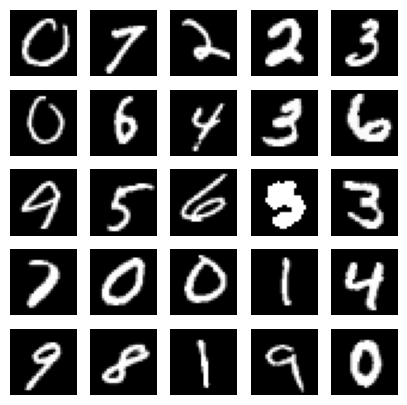

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

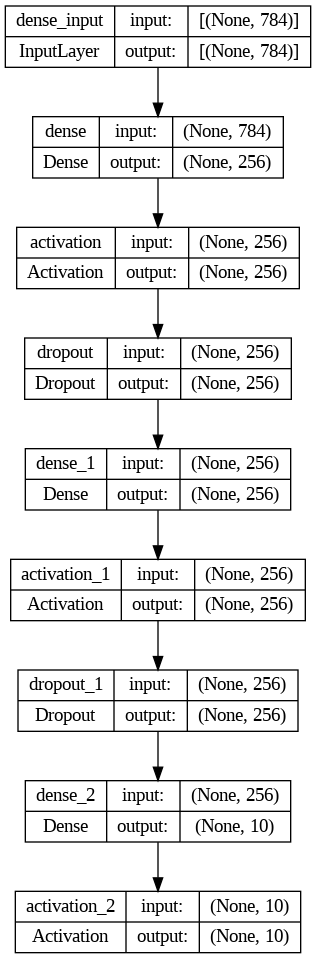

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 3ms/step - loss: 0.4255 - accuracy: 0.8691
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1935 - accuracy: 0.9423
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1529 - accuracy: 0.9550
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1280 - accuracy: 0.9609
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1134 - accuracy: 0.9657
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1041 - accuracy: 0.9682
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0926 - accuracy: 0.9714
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9729
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9746
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0790 - accuracy: 0.9750

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9822

Test accuracy: 98.2%


In [ ]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))